In [1]:
import gym
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Convolution2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy , EpsGreedyQPolicy

In [3]:
def build_model(height,width,channels,actions):
    """
    This Function creates a cnn model with, 
    3 Convo2D layers with dropout and maxpool2d in each layer.
    next it flattens the layers and has 3 Dense layer.
    
    The Output space has the shape of the actions provided in the input
    
    note:- actions is the number of possiable actions that the agent can take
    """
    model = Sequential()
    model.add(Convolution2D(32,(8,8),strides=(4,4),activation="relu",input_shape = (3, height, width, channels)))
#     model.add(MaxPool2D())
    model.add(Dropout(0.25))
    model.add(Convolution2D(64,(4,4),strides=(2,2),activation="relu"))
#     model.add(MaxPool2D())
    model.add(Dropout(0.25))
    model.add(Convolution2D(64,(2,2),activation="relu"))
#     model.add(MaxPool2D())
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(actions,activation="linear"))
    return model

In [4]:
def build_agent(model,actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),attr="eps",value_max=1,value_min=0.1,value_test=0.2,nb_steps=10000)
    memory = SequentialMemory(limit=1000, window_length = 3)
    dqn = DQNAgent(model = model,memory = memory,policy=policy,enable_dueling_network=True,dueling_type='avg',nb_actions=actions,nb_steps_warmup=1000)
    return dqn

In [7]:
env = gym.make("SpaceInvaders-v0")
height, width, channels =  env.observation_space.shape
actions = env.action_space.n

A.L.E: Arcade Learning Environment (version +978d2ce)
[Powered by Stella]


In [8]:
model = build_model(height,width,channels,actions)
dqn = build_agent(model,actions)

In [13]:
notCompileState = True
while(notCompileState):
    try:
        dqn = build_agent(model,actions)
        notCompileState = False
    except Exception as e:
        print("Encountered Exception {}".format(e))
        del model
        model = build_model(height,width,channels,actions)
        notCompileState = True
dqn.compile(Adam(lr=1e-4))
        

/Users/yashtripathi/miniforge3/envs/test1/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-01-12 12:12:14.247655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-12 12:12:14.261618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-12 12:12:14.343716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-12 12:12:14.367179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [ ]:
scoreArr = []
testRange = 10

for i in range(testRange):
    dqn.load_weights("wholeNight/SpaceInvaders{}.hf5".format(i))
    localScore = dqn.test(env,nb_episodes=200,visualize=False)
    scoreArr.append(localScore)


Testing for 200 episodes ...
Episode 1: reward: 135.000, steps: 586
Episode 2: reward: 215.000, steps: 791
Episode 3: reward: 240.000, steps: 1267
Episode 4: reward: 55.000, steps: 484
Episode 5: reward: 155.000, steps: 699
Episode 6: reward: 135.000, steps: 700
Episode 7: reward: 105.000, steps: 547
Episode 8: reward: 460.000, steps: 1105
Episode 9: reward: 155.000, steps: 696
Episode 10: reward: 565.000, steps: 1193
Episode 11: reward: 125.000, steps: 668
Episode 12: reward: 105.000, steps: 487
Episode 13: reward: 315.000, steps: 1197
Episode 14: reward: 185.000, steps: 802
Episode 15: reward: 590.000, steps: 1138
Episode 16: reward: 105.000, steps: 568
Episode 17: reward: 110.000, steps: 607
Episode 18: reward: 230.000, steps: 845
Episode 19: reward: 210.000, steps: 784
Episode 20: reward: 80.000, steps: 609
Episode 21: reward: 285.000, steps: 1029
Episode 22: reward: 210.000, steps: 838
Episode 23: reward: 110.000, steps: 755
Episode 24: reward: 145.000, steps: 788
Episode 25: rewa

In [23]:
dqn.test(env,nb_episodes=5,visualize=True,verbose=1)

Testing for 5 episodes ...
Episode 1: reward: 110.000, steps: 606
Episode 2: reward: 365.000, steps: 1165
Episode 3: reward: 120.000, steps: 578
Episode 4: reward: 210.000, steps: 761
Episode 5: reward: 210.000, steps: 713


In [20]:
scoreArr[0].history

{'episode_reward': [365.0,
  265.0,
  135.0,
  615.0,
  285.0,
  105.0,
  180.0,
  215.0,
  430.0,
  435.0],
 'nb_steps': [1414, 948, 789, 1447, 1472, 776, 814, 816, 893, 995]}

In [35]:
import matplotlib.pyplot as plt


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


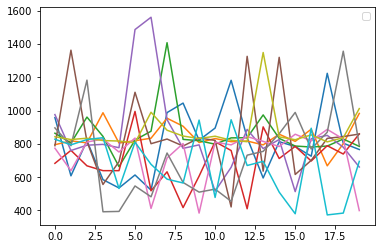

In [68]:
for i in range(10):
    x = np.array(scoreArr[i].history["nb_steps"])
    
    plt.plot(x)
plt.legend()
plt.show()

In [52]:
scoreArr[i].history["episode_reward"]

[255.0,
 125.0,
 190.0,
 75.0,
 30.0,
 75.0,
 20.0,
 215.0,
 340.0,
 185.0,
 230.0,
 380.0,
 205.0,
 95.0,
 135.0,
 155.0,
 120.0,
 445.0,
 155.0,
 105.0]

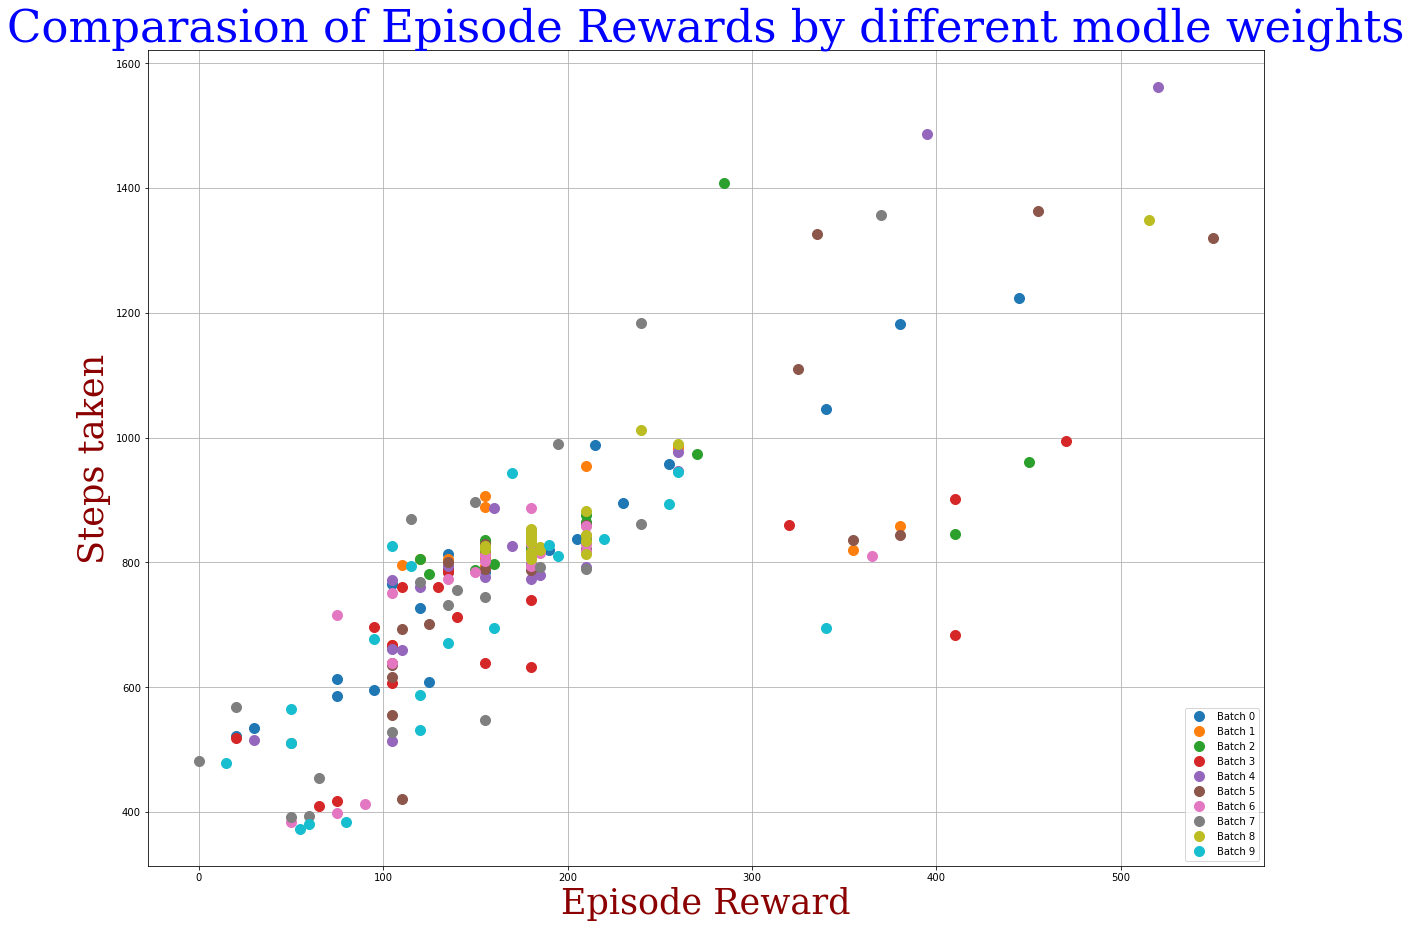

In [88]:
MarkerArr = ['o','*','.',',','x','X','+','P','s','D','d','p','H','h','v','^','<','>','1','2']
font1 = {'family':'serif','color':'blue','size':45}
font2 = {'family':'serif','color':'darkred','size':35}

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)


for i in range(10):
    x = np.array(scoreArr[i].history["episode_reward"])
    y = np.array(scoreArr[i].history["nb_steps"])
    
    plt.plot(x,y,MarkerArr[2],label="Batch "+str(i),ms=20)
    
    
    
plt.title("Comparasion of Episode Rewards by different modle weights",fontdict=font1)
plt.xlabel("Episode Reward",fontdict=font2)
plt.ylabel("Steps taken",fontdict=font2)
plt.legend(loc ="lower right")
plt.grid()
plt.show()

In [ ]:
['o','*','.',',','x','X','+','P','s','D','d','p','H','h','v','^','<','>','1','2']